# Estimated beta vs MAF analysis

The goal of this analysis is to see the correlation between MAF and rescaled marginal effect size.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import random


In [2]:
random.seed(42)
sns.set_style("white")
sns.set_context("paper", font_scale=1.0)
sns.set_palette(sns.color_palette("rocket"))


In [3]:
dataset = pl.read_parquet("rescaled-beta.parquet")


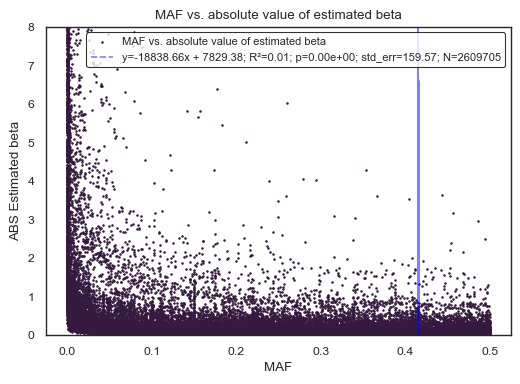

In [4]:
# plot est beta vs maf

data = dataset.select(
    pl.col("majorPopulationMAF"),
    pl.col("rescaledStatistics").struct.field("estimatedBeta").abs().alias("absEstimatedBeta"),
    pl.col("studyType"),
).filter(pl.col("majorPopulationMAF").is_not_null() & pl.col("absEstimatedBeta").is_finite())
reg = linregress(
    data["majorPopulationMAF"],
    data["absEstimatedBeta"],
)
slope, intercept, r_value, p_value, std_err = reg
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(
    x=data["majorPopulationMAF"],
    y=data["absEstimatedBeta"],
    label="MAF vs. absolute value of estimated beta",
    s=1,
)
line_eq = f"y={slope:.2f}x + {intercept:.2f}"
line_eq += f"; R²={r_value**2:.2f}"
line_eq += f"; p={p_value:.2e}"
line_eq += f"; std_err={std_err:.2f}"
line_eq += f"; N={data.shape[0]}"

ax.plot(
    data["majorPopulationMAF"],
    slope * data["majorPopulationMAF"] + intercept,
    "--",
    color="blue",
    alpha=0.5,
    label=line_eq,
)
ax.set_title("MAF vs. absolute value of estimated beta")
ax.set_xlabel("MAF")
ax.set_ylabel("ABS Estimated beta")
ax.set_ylim(0, 8)
ax.legend(
    loc="upper right",
    fontsize=8,
    title_fontsize=10,
    frameon=True,
    facecolor="white",
    edgecolor="black",
)

plt.show()


Plot the same plots for MAF vs abs(beta) for binary and quantitative traits 

In [ ]:
data = dataset.select(
    pl.col("majorPopulationMAF"),
    pl.col("rescaledStatistics").struct.field("estimatedBeta").abs().alias("absEstimatedBeta"),
    pl.col("studyType"),
    pl.col("rescaledStatistics").struct.field("traitClass"),
).filter(pl.col("majorPopulationMAF").is_not_null() & pl.col("absEstimatedBeta").is_finite())
data.group_by("traitClass").len()


traitClass,len
str,u32
"""binary""",69725
"""quantitative""",2539980


In [ ]:
data


majorPopulationMAF,absEstimatedBeta,studyType,traitClass
f64,f64,str,str
0.291447,211.877795,"""eqtl""","""quantitative"""
0.291447,198.365645,"""eqtl""","""quantitative"""
0.03903,260.641789,"""eqtl""","""quantitative"""
0.395246,114.193674,"""eqtl""","""quantitative"""
0.361636,85.09672,"""eqtl""","""quantitative"""
…,…,…,…
0.20058,334.207711,"""eqtl""","""quantitative"""
0.264814,0.088602,"""gwas""","""binary"""
0.309175,0.079953,"""gwas""","""binary"""


shape: (2_539_980, 4)
┌────────────────────┬──────────────────┬───────────┬──────────────┐
│ majorPopulationMAF ┆ absEstimatedBeta ┆ studyType ┆ traitClass   │
│ ---                ┆ ---              ┆ ---       ┆ ---          │
│ f64                ┆ f64              ┆ str       ┆ str          │
╞════════════════════╪══════════════════╪═══════════╪══════════════╡
│ 0.291447           ┆ 211.877795       ┆ eqtl      ┆ quantitative │
│ 0.291447           ┆ 198.365645       ┆ eqtl      ┆ quantitative │
│ 0.03903            ┆ 260.641789       ┆ eqtl      ┆ quantitative │
│ 0.395246           ┆ 114.193674       ┆ eqtl      ┆ quantitative │
│ 0.361636           ┆ 85.09672         ┆ eqtl      ┆ quantitative │
│ …                  ┆ …                ┆ …         ┆ …            │
│ 0.20058            ┆ 175.878799       ┆ eqtl      ┆ quantitative │
│ 0.20058            ┆ 342.80392        ┆ eqtl      ┆ quantitative │
│ 0.20058            ┆ 190.732911       ┆ eqtl      ┆ quantitative │
│ 0.20058   

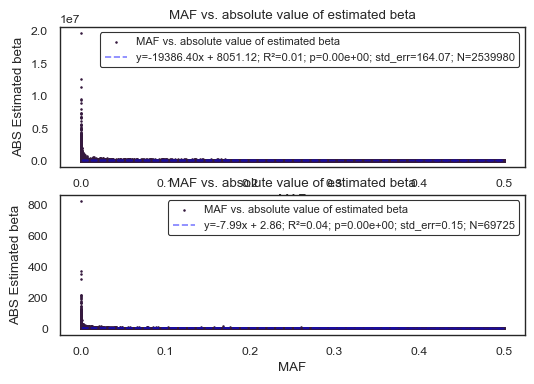

In [ ]:
fig = plt.figure(figsize=(6, 4))

_data = data.filter(pl.col("traitClass") == "quantitative")
reg = linregress(
    _data["majorPopulationMAF"],
    _data["absEstimatedBeta"],
)
slope, intercept, r_value, p_value, std_err = reg

ax = fig.add_subplot(2, 1, 1)
ax.scatter(
    x=_data["majorPopulationMAF"],
    y=_data["absEstimatedBeta"],
    label="MAF vs. absolute value of estimated beta",
    s=1,
)
line_eq = f"y={slope:.2f}x + {intercept:.2f}"
line_eq += f"; R²={r_value**2:.2f}"
line_eq += f"; p={p_value:.2e}"
line_eq += f"; std_err={std_err:.2f}"
line_eq += f"; N={_data.shape[0]}"

ax.plot(
    _data["majorPopulationMAF"],
    slope * _data["majorPopulationMAF"] + intercept,
    "--",
    color="blue",
    alpha=0.5,
    label=line_eq,
)
ax.set_title("MAF vs. absolute value of estimated beta")
ax.set_xlabel("MAF")
ax.set_ylabel("ABS Estimated beta")
# ax.set_ylim(0, 8)
ax.legend(
    loc="upper right",
    fontsize=8,
    title_fontsize=10,
    frameon=True,
    facecolor="white",
    edgecolor="black",
)
_data = data.filter(pl.col("traitClass") == "binary")
reg = linregress(
    _data["majorPopulationMAF"],
    _data["absEstimatedBeta"],
)
slope, intercept, r_value, p_value, std_err = reg
ax = fig.add_subplot(2, 1, 2)
ax.scatter(
    x=_data["majorPopulationMAF"],
    y=_data["absEstimatedBeta"],
    label="MAF vs. absolute value of estimated beta",
    s=1,
)
line_eq = f"y={slope:.2f}x + {intercept:.2f}"
line_eq += f"; R²={r_value**2:.2f}"
line_eq += f"; p={p_value:.2e}"
line_eq += f"; std_err={std_err:.2f}"
line_eq += f"; N={_data.shape[0]}"

ax.plot(
    _data["majorPopulationMAF"],
    slope * _data["majorPopulationMAF"] + intercept,
    "--",
    color="blue",
    alpha=0.5,
    label=line_eq,
)
ax.set_title("MAF vs. absolute value of estimated beta")
ax.set_xlabel("MAF")
ax.set_ylabel("ABS Estimated beta")
# ax.set_ylim(0, 8)
ax.legend(
    loc="upper right",
    fontsize=8,
    title_fontsize=10,
    frameon=True,
    facecolor="white",
    edgecolor="black",
)


plt.show()


shape: (69_725, 4)
┌────────────────────┬──────────────────┬───────────┬────────────┐
│ majorPopulationMAF ┆ absEstimatedBeta ┆ studyType ┆ traitClass │
│ ---                ┆ ---              ┆ ---       ┆ ---        │
│ f64                ┆ f64              ┆ str       ┆ str        │
╞════════════════════╪══════════════════╪═══════════╪════════════╡
│ 0.384681           ┆ 0.053191         ┆ gwas      ┆ binary     │
│ 0.375772           ┆ 0.503704         ┆ gwas      ┆ binary     │
│ 0.075686           ┆ 0.096856         ┆ gwas      ┆ binary     │
│ 0.269644           ┆ 0.032722         ┆ gwas      ┆ binary     │
│ 0.269201           ┆ 0.072193         ┆ gwas      ┆ binary     │
│ …                  ┆ …                ┆ …         ┆ …          │
│ 0.16014            ┆ 0.065743         ┆ gwas      ┆ binary     │
│ 0.34               ┆ 0.06112          ┆ gwas      ┆ binary     │
│ 0.264814           ┆ 0.088602         ┆ gwas      ┆ binary     │
│ 0.309175           ┆ 0.079953         ┆ g

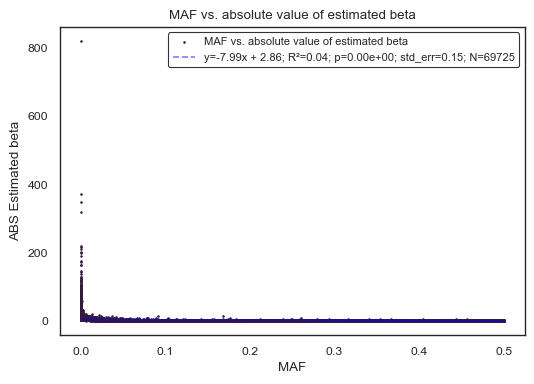

In [ ]:
plt.show()
